# Exploring Themes in Modern Art

Erin Zhu
3/20/2023

## Introduction

### Overview
[The Museum of Modern Art (MoMA) Collection](https://github.com/MuseumofModernArt/collection)

* The Museum of Modern Art (MoMA) acquired its first artworks in 1929, the year it was established. Today, the Museum’s evolving collection contains almost 200,000 works from around the world spanning the last 150 years. The collection includes an ever-expanding range of visual expression, including painting, sculpture, printmaking, drawing, photography, architecture, design, film, and media and performance art.

* The Artists dataset contains 15,243 records, representing all the artists who have work in MoMA's collection and have been cataloged in our database. It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.

* This project explores the collection and aims to reveal what artworks are more flavored in modern arts, or in this collection, cutting from different aspects such as themes, scales, and gender ratio of the artworks. 

### Research Topic

* Through analysis on the distribution of the artists and different scales of the artwork, this project researches the underlying information in this dataset, and studies implicit determinants that makes an artwork more flavored in modern art. This project focuses on social and economy environment, gender, and nationality of artists to give a general assessment of possible aspects that affects the frequency of appearance of artworks in this collection and explore the underlying reasons for the pervalence of such artworks. 

### Questions

* What makes a certain type of artwork more common in modern arts and in this collection? Is it gender? Is it history backgrounds? Is it nationality, or even the size of the artwork itself? 
* Are there underrepresented groups in this collection? If there are, what are these groups and what might be the cause of the underrepresentation? 

### Motivation

* Through exploring this dataset, I gradually becomes curious about these questions. The dataset itself is too large to find a certain pattern in it, but with the help of tools, it is possible for us to explore the whole dataset in condensed visualizations. 
* Based off the methods we learned in class, I was interested in how mapping and text analysis could be applied in this dataset to visualize some invisible patterns in this dataset and hopefully approach my research questions and provide some insights into what are we seeing and not seeing in seemingly unbiased artwork collections and even some underrepresented artworks and groups in this collection. I hope that this project would allow us to see some implicit factors that are affecting our flavor of artworks, including reasonable factors and underlying biases. 

## Methods

* TODO: explain your data and your analytical process

## Results

### Data Exploration

Let's start off by importing the dataset and sample some rows in the datasets. 

In [19]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import string
import geopandas as gpd
import pycountry

import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

In [2]:
# importing data

artists_df = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv')
artworks_df = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artworks.csv')

In [3]:
artists_df.sample(5)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
14167,49295,George Kastner,NaN,NaN,NaN,0,0,NaN,NaN
2727,3059,Isamu Kenmochi,"Japanese, 1912–1971",Japanese,Male,1912,1971,NaN,NaN
10526,29875,Anon,NaN,NaN,Male,0,0,NaN,NaN
12382,39013,Sophie Peters,NaN,NaN,NaN,0,0,NaN,NaN
6865,7810,Sarah Lucas,"British, born 1962",British,Female,1962,0,Q267786,500115024.0


In [4]:
artworks_df.sample(5)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
100823,"Poster for Ten from Rutgers University, Bianch...",Bill Hine,73972,NaN,(),(0),(0),(),1965,Offset (CONFIRM),...,NaN,NaN,NaN,NaN,55.562611,NaN,NaN,43.180086,NaN,NaN
18493,Plate (page 50) from TEGNINGER I MØRKET,Troels Wörsel,6453,"(Danish, born 1950)",(Danish),(1950),(0),(Male),1977,NaN,...,NaN,NaN,NaN,NaN,24.300000,NaN,NaN,17.400000,NaN,NaN
77722,"Spiraling Eyes, frontispiece, from the illustr...",Louise Bourgeois,710,"(American, born France. 1911–2010)",(American),(1911),(2010),(Female),1999,"Drypoint, with hand additions",...,http://www.moma.org/media/W1siZiIsIjI0MzUzMyJd...,NaN,NaN,NaN,14.900000,NaN,NaN,12.600000,NaN,NaN
2481,Easy Chair (Fauteuil Grand Confort),"Le Corbusier (Charles-Édouard Jeanneret), Pier...","3426, 2899, 4564","(French, born Switzerland. 1887–1965) (Swiss, ...",(French) (Swiss) (French),(1887) (1896) (1903),(1965) (1967) (1999),(Male) (Male) (Female),Designed 1928 (this example 1959),"Chrome-plated tubular steel, horsehair, down, ...",...,http://www.moma.org/media/W1siZiIsIjIyOTMxNCJd...,NaN,70.5,NaN,66.040100,NaN,NaN,76.200200,NaN,NaN
70454,With Heart of Sethoscope Beat from the series ...,Reva Urban,6037,"(American, 1925–1987)",(American),(1925),(1987),(Female),1962,One from a series of fourteen lithographs,...,NaN,NaN,NaN,NaN,66.400000,NaN,NaN,66.300000,NaN,NaN


In [5]:
artworks_df['Title'].sample(10)

11801     Plate (folio 17 verso) from AUTONOMIE DER FARBE
124974                    Untitled from Tailleur de Coeur
104739                      Die Aktion, vol. 6, no. 47/48
13073           Sometimes a Traveler/There Lived in Egypt
40278          HÔTEL DE MARBEUF. FAUBOURG SAINT-HONORÉ 31
50974                          Saratoga Springs, New York
128413                                     Present Memory
74862                               Spectre of Kitty Hawk
48550       Portland, Oregon. (JFK and others at airport)
85851                             Untitled (Bondage Duck)
Name: Title, dtype: object

In [6]:
artworks_df['Medium'].sample(10)

14352                                                   NaN
17784                                                   NaN
79407                                            Lithograph
65378                                            Lithograph
8959      Etching, lift ground aquatint, and collagraph,...
121261                                  7-inch vinyl record
67273                                            Lithograph
97634                                       Pencil on paper
44106               Gelatin silver printing-out-paper print
36144     Felt-tip pen and cut-and-pasted gelatin silver...
Name: Medium, dtype: object

Through the example lines, we can see that the title and the medium column are very detailed and thus hard to use as raw to generate summary statistics. 
* Some title column contains not only the titles of the artworks but also some other information. A good way would be to keep only the first part of the title, which is the part before the first ',', to keep as the title of the artwork. 
* The original plan was to create pie plot for types of artworks and relate with other data. Since the 'Medium' column is much more detailed than expected, it would be hard to follow the original plan. Therefore, I decided to explore my topics cutting in from other columns. 

In [7]:
# This cell takes some time to run

artworks_df['First Title'] = '-'

count = 0
for title in artworks_df['Title']:
    if type(title) is str: 
        artworks_df['First Title'][count] = title.split(',')[0]
        count = count + 1

/tmp/ipykernel_83/188276451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['First Title'][count] = title.split(',')[0]


Now, there will be a new column in the dataframe containing only the first part of the title that will be used for sentiment analysis in the analysis part. 

Text(0, 0.5, 'Frequency')

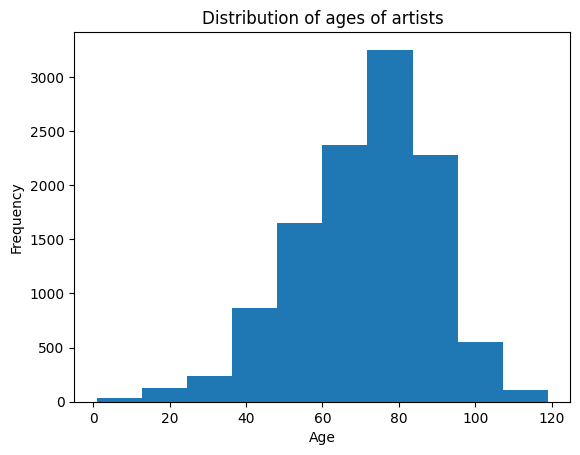

In [8]:
# create a list for ages of artists

count = 0
ages = []
for bd in artists_df['BeginDate']:
    if bd == 0:
        count = count + 1
        continue
    if artists_df['EndDate'][count] == 0:
        age = 2023 - bd
        ages = ages + [age]
        count = count + 1
    else:
        age = artists_df['EndDate'][count] - bd
        ages = ages + [age]
        count = count + 1

# exclude some impossible values

ages = [age for age in ages if age < 120]

plt.hist(ages)
plt.title('Distribution of ages of artists')
plt.xlabel('Age')
plt.ylabel('Frequency')

Above is the distribution of ages of artists in this collection with impossible values excluded. We can see that the majority of artists in this collection ages from around 50 to 90. 

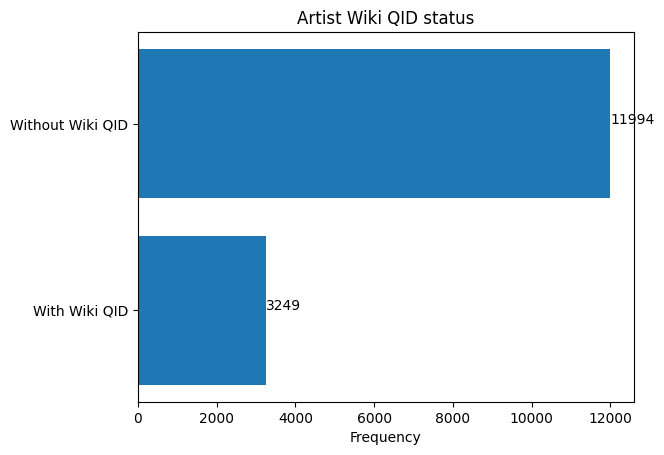

In [9]:
# create a list for counts of artists with and without Wiki QID

type = ['With Wiki QID', 'Without Wiki QID']
count = [0, 0]


for i in artists_df['Wiki QID']:
    if pd.isna(i):
        count[1] = count[1] + 1
    else:
        count[0] = count[0] + 1

plt.barh(type, count)
 
for index, value in enumerate(count):
    plt.text(value, index,str(value))
 
plt.title('Artist Wiki QID status')
plt.xlabel('Frequency')
plt.show()

The above plot shows the number of artists with and without Wiki QID. We can see that the majority of artists in this collection does not have a Wiki QID, implying that this collection probably does not have a tendency towards famous artists. 

In [10]:
date_list = []
for i in artworks_df['Date']:
  if (not pd.isna(i)) and i.isnumeric() and len(i) == 4:
    date_list = date_list + [int(i)]

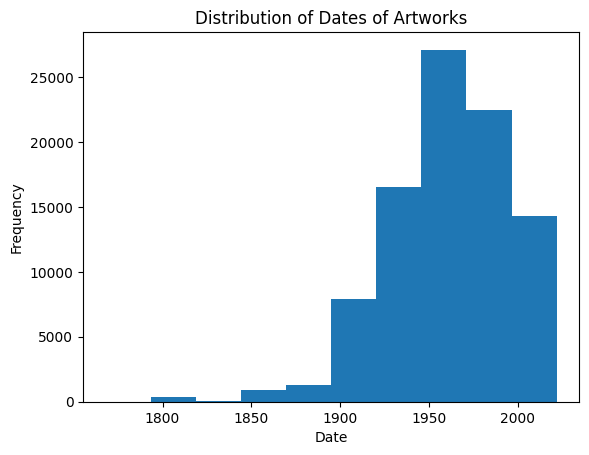

In [11]:
plt.hist(date_list)
plt.title('Distribution of Dates of Artworks')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

Above is a histogram on the distribution of dates that artworks are created. We can see that the graph is right skewed, which means it flavors artworks that are more contemporary as a modern art collection, and has the most artworks created from early 1900s to 2000s. 

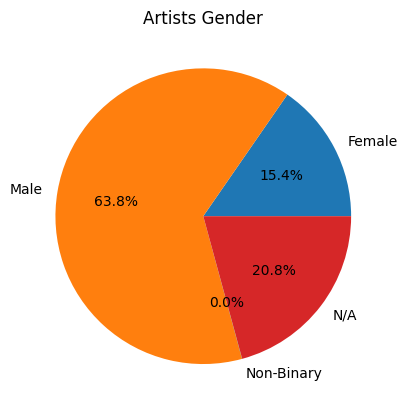

In [12]:
gender = ['Female', 'Male', 'Non-Binary', 'N/A']
gender_count = [0, 0, 0, 0]

for i in artists_df['Gender']:
    if pd.isna(i):
        gender_count[3] += 1
    elif i.lower() == 'female':
        gender_count[0] += 1
    elif i.lower() == 'male':
        gender_count[1] += 1
    elif i.lower() == 'non-binary':
        gender_count[2] += 1
    else:
        gender_count[3] += 1

plt.pie(gender_count, labels=gender, autopct='%1.1f%%')
plt.title('Artists Gender')
plt.show()

From the plot, we can see that most of the artists in this collection are male, 15.4% of them are female, and only nearly neglectable part of them are non-binary. This shows that male artists are more recognized and acknowledged generally within the range of collection. As shown on former graph, the major range of collection for this dataset is between 1900 and 2010, to explore more about how gender of artists could affect themselves and their artworks and how it combines with other factors such as dates and history backgrounds, it is worthy do dig deeper into the relationships of gender and other data in the following focused analysis. 

Also, we can see that the nationality in the dataframe is noted in a different way from geopanda's notion of country names. Thus, we can add a new column of country name corresponding to the 'Nationality' column. 

In [13]:
# Read a new csv file that corresponds nationality to country
nationality_country = pd.read_csv('https://github.com/knowitall/chunkedextractor/raw/master/src/main/resources/edu/knowitall/chunkedextractor/demonyms.csv')

In [14]:
nationality_country.columns = ['Nationality', 'Country']

,Nationality,Country
0,Aberdonian,Aberdeen
1,Abkhaz,Abkhazia
2,Abkhazian,Abkhazia
3,Abrenian,Abra
4,Abruzzese,Abruzzo


In [15]:
# Create a new column to store country name
artworks_df['Country'] = '-'

count = 0
for i in artworks_df['Nationality']:
    try: 
        # remove the ()
        nat = i[1:len(i)-1]
        artworks_df['Country'][count] = nationality_country.loc[nationality_country['Nationality'] == nat, 'Country'].values[0]
        count += 1
    except:
        count += 1

/tmp/ipykernel_83/3593956855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Country'][count] = nationality_country.loc[nationality_country['Nationality'] == nat, 'Country'].values[0]


### Focused Analysis

* Through some exploratoration on the dataset, we can see that this collection does not have uniform distribution on a lot of aspects of artists and artworks. It provides some general insights on the dataset, but not enough to allow us to make conclutions or imply some other underlying factors that causes such distributions. 

* The next session includes a further analysis of the data and provides visualizations to provide a deeper look into the dataset and useful insights that cuts in from a more detailed look to explore the research question. 

In [16]:
# add a new column 'Area' to the dataframe, rounded up to two decimals, in cm^2
artworks_df['Area'] = '-'

count = 0
for a in artworks_df['Area']:
  if pd.isna(artworks_df['Height (cm)'][count]) or pd.isna(artworks_df['Width (cm)'][count]):
    artworks_df['Area'][count] = 0
    count += 1
  else:
    artworks_df['Area'][count] = round(artworks_df['Height (cm)'][count] * artworks_df['Width (cm)'][count], 2)
    count += 1

/tmp/ipykernel_83/658045223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Area'][count] = round(artworks_df['Height (cm)'][count] * artworks_df['Width (cm)'][count], 2)
/tmp/ipykernel_83/658045223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Area'][count] = 0


In [17]:
# add a new column for country code for mapping
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

artworks_df['CODE']=alpha3code(artworks_df.Country)

In [21]:
# create a new column to store the sentiment analysis of the title
sia = vader.SentimentIntensityAnalyzer()
myStopWords = list(string.punctuation) + stopwords.words('english')
porter = PorterStemmer()

In [24]:
artworks_df['Sentiment Score'] = 0

count = 0
for t in artworks_df['First Title']:
    t_token = [w for w in word_tokenize(t.lower()) if w not in myStopWords]
    t_token = [porter.stem(token) for token in t_token]
    score = 0
    
    for w in t_token:
        score += sia.polarity_scores(w)['compound']
    
    artworks_df['Sentiment Score'][count] = score
    count += 1

/tmp/ipykernel_83/690819950.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Sentiment Score'][count] = score


In the above part, I was intended to create a column to store the sentiment score by text analyzing the title of the artworks. This does not came as I expected as most artworks have neutral titles and have 0 compound scores.

Therefore, I switched my focus onto studying the relationships between size and date of the artworks, and the gender and nationality of the artists. 

In [82]:
date_min = 3000
date_max = 0
for i in artworks_df['Date']:
  if (not pd.isna(i)) and i.isnumeric() and len(i) == 4:
    i = int(i)
    if i < date_min:
        date_min = i
    if i > date_max: 
        date_max = i

print(date_min)
print(date_max)

1768
2022


Since the 'Date' column in the artworks data does not only contain year, I only collected these with 4-digit year number. 

In [86]:
# create a dataframe for every decade from 1760 to 2020
decade = [*range(1760, 2030, 10)]
date_df = pd.DataFrame(decade, columns=['Date'])

In [117]:
# create new columns for total number, gender, and average area
date_df['Count'] = 0
date_df['Male'] = 0
date_df['Female'] = 0
date_df['Non-binary'] = 0
date_df['Other'] = 0
date_df['Area'] = 0

count = 0
for d in artworks_df['Date']:
    if (not pd.isna(d)) and d.isnumeric() and len(d) == 4:
        # round down to decade
        d = int(d)
        d /= 10
        d = math.floor(d)
        d *= 10
        
        # update count
        date_df.loc[date_df['Date'] == d, 'Count'] += 1
        
        # update gender count
        i = artworks_df['Gender'][count]
        if pd.isna(i):
            date_df.loc[date_df['Date'] == d, 'Other'] += 1
        else:
            i = i[1:len(i)-1]
            if i.lower() == 'female':
                date_df.loc[date_df['Date'] == d, 'Female'] += 1
            elif i.lower() == 'male':
                date_df.loc[date_df['Date'] == d, 'Male'] += 1
            elif i.lower() == 'non-binary':
                date_df.loc[date_df['Date'] == d, 'Non-binary'] += 1
            else:
                date_df.loc[date_df['Date'] == d, 'Other'] += 1
        
        # update area
        a = artworks_df['Area'][count]
        date_df.loc[date_df['Date'] == d, 'Area'] += a
        
        count += 1
    else:
        count += 1

date_df.Area /= date_df.Count
date_df.Area = date_df.Area.round()

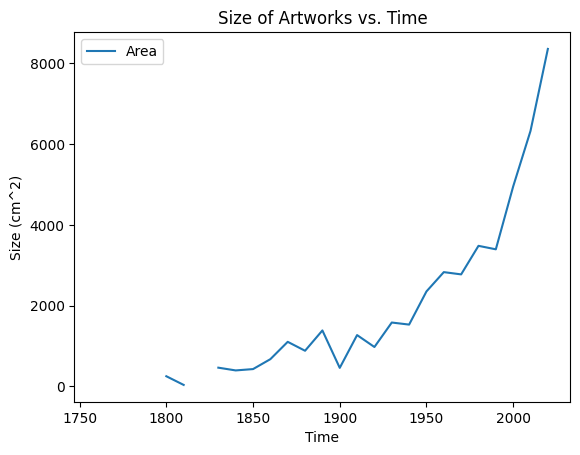

In [121]:
date_df.plot(x='Date', y='Area', kind='line')

plt.title('Size of Artworks vs. Time')
plt.xlabel('Time')
plt.ylabel('Size (cm^2)')
plt.show()

<AxesSubplot: xlabel='Date'>

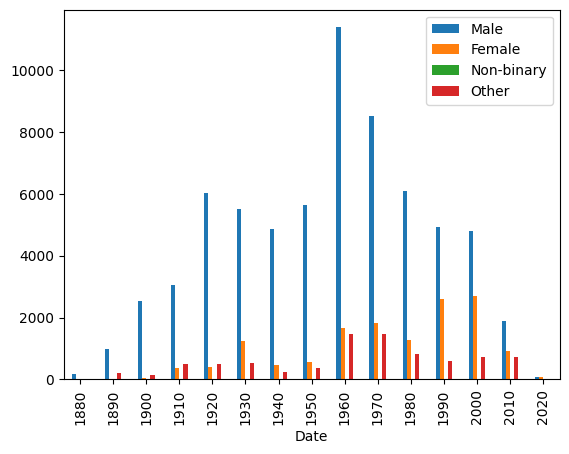

In [125]:
date_df.loc[date_df['Date']>=1880].plot(x='Date', y=['Male', 'Female', 'Non-binary', 'Other'], kind='bar')

In [144]:

gender_list = ['Male', 'Female', 'Non-binary', 'Other']
area_list = [0, 0, 0, 0]
area_count = [0, 0, 0, 0]

count = 0
for a in artworks_df['Area']:
    if not a == 0:
        i = artworks_df['Gender'][count]
        if pd.isna(i):
            area_list[3] += a
            area_count[3] += 1
        else:
            i = i[1:len(i)-1]
            if i.lower() == 'female':
                area_list[1] += a
                area_count[1] += 1
            elif i.lower() == 'male':
                area_list[0] += a
                area_count[0] += 1
            elif i.lower() == 'non-binary':
                area_list[2] += a
                area_count[2] += 1
            else:
                area_list[3] += a
                area_count[3] += 1
    count += 1
                
for i in range(0, 4):
    if area_count[i] != 0: 
        area_list[i] /= area_count[i]
    round(area_list[i], 2)

In [145]:
gender_list.pop(2)
area_list.pop(2)

27525.76

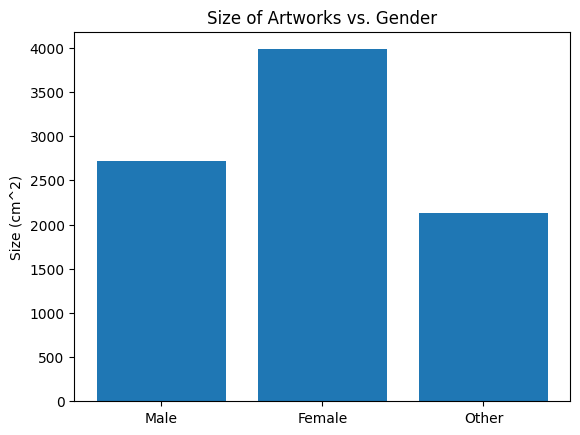

In [146]:
plt.bar(gender_list, area_list)
plt.title('Size of Artworks vs. Gender')
plt.ylabel('Size (cm^2)')
plt.show()

In [32]:
# create a new df storing data for each country/region

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

# merge with location data
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
world=world.merge(location,on='name')

In [34]:
# create a new column to count the number of artworks for each country/region
world['Count'] = 0
for c in artworks_df['CODE']:
    world.loc[world['CODE'] == c, 'Count'] += 1

In [149]:
# create a new column for area
world['Area'] = 0
world['AreaCount'] = 0

count = 0
for c in artworks_df['CODE']:
    world.loc[world['CODE'] == c, 'Area'] += artworks_df['Area'][count]
    if artworks_df['Area'][count] != 0:
        world.loc[world['CODE'] == c, 'AreaCount'] += 1
    count += 1

world.Area /= world.AreaCount

In [150]:
world.Area = world.Area.round()

In [44]:
# create a new column for sentiment 
world['Sentiment'] = 0

count = 0
for c in artworks_df['CODE']:
    world.loc[world['CODE'] == c, 'Sentiment'] += artworks_df['Sentiment Score'][count]
    count += 1

world.Sentiment /= world.Count

In [48]:
world.Sentiment = world.Sentiment.round()

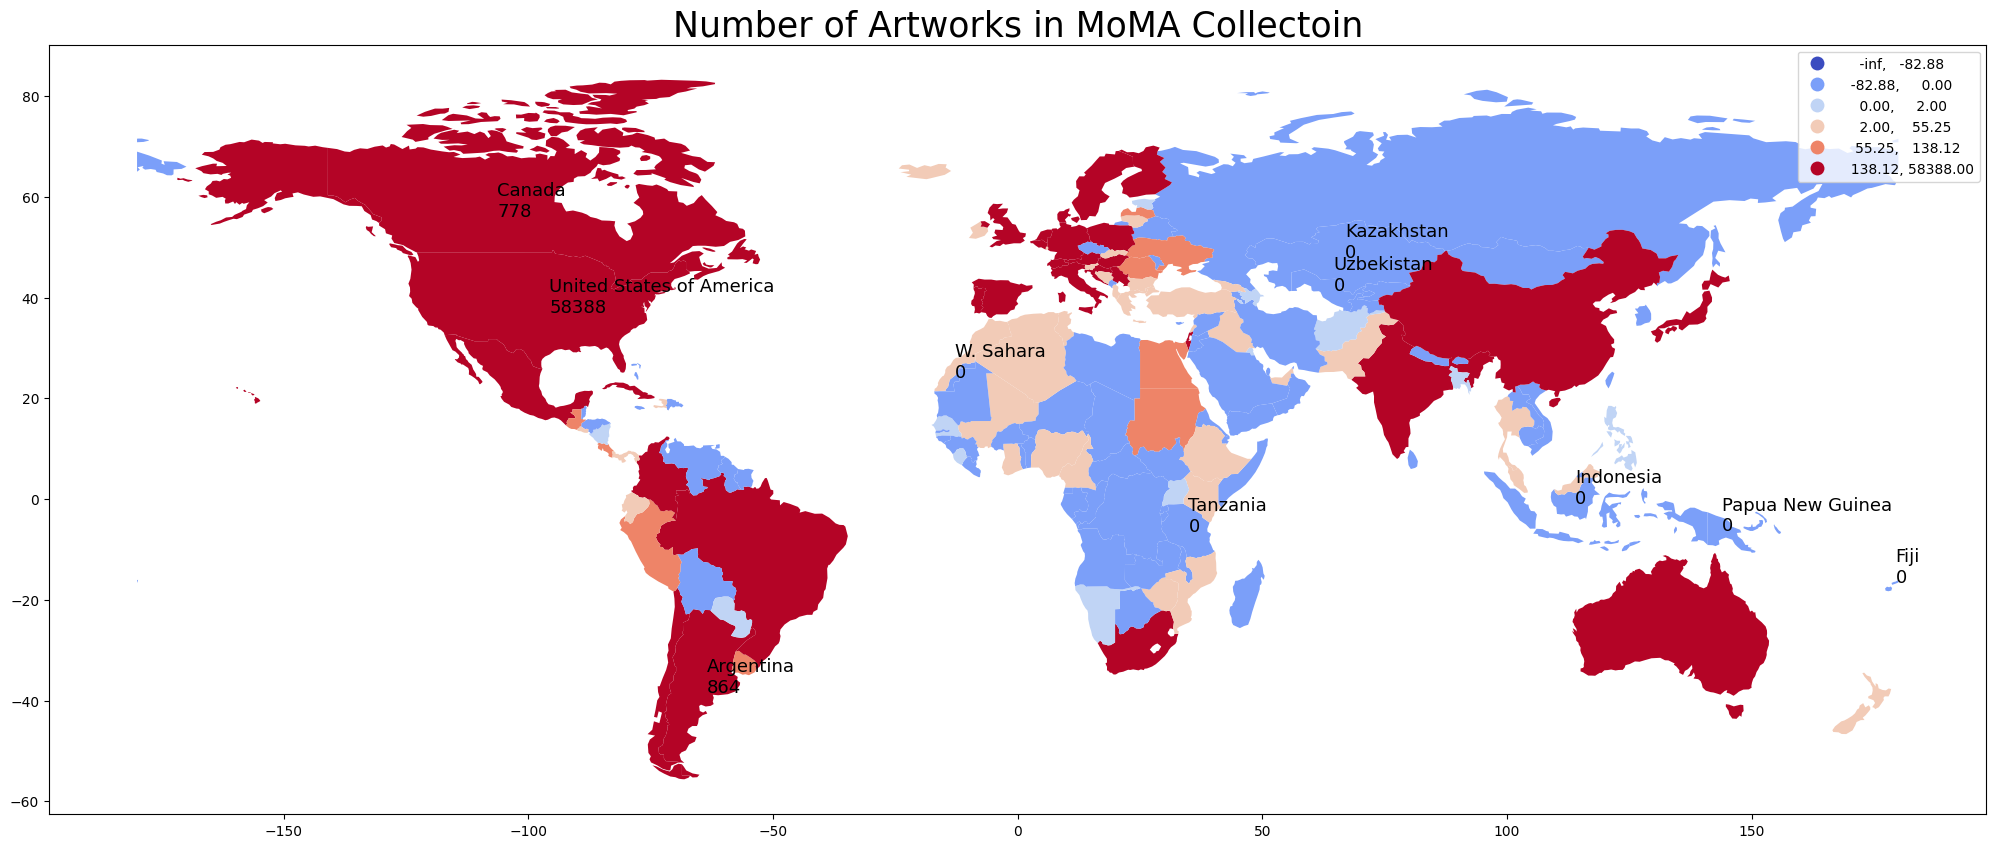

In [156]:
# plot count world map
world.plot(column='Count', scheme="box_plot",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Number of Artworks in MoMA Collectoin',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(world.longitude[i]),float(world.latitude[i]),"{}\n{}".format(world.name[i],world.Count[i]),size=13)
plt.show()

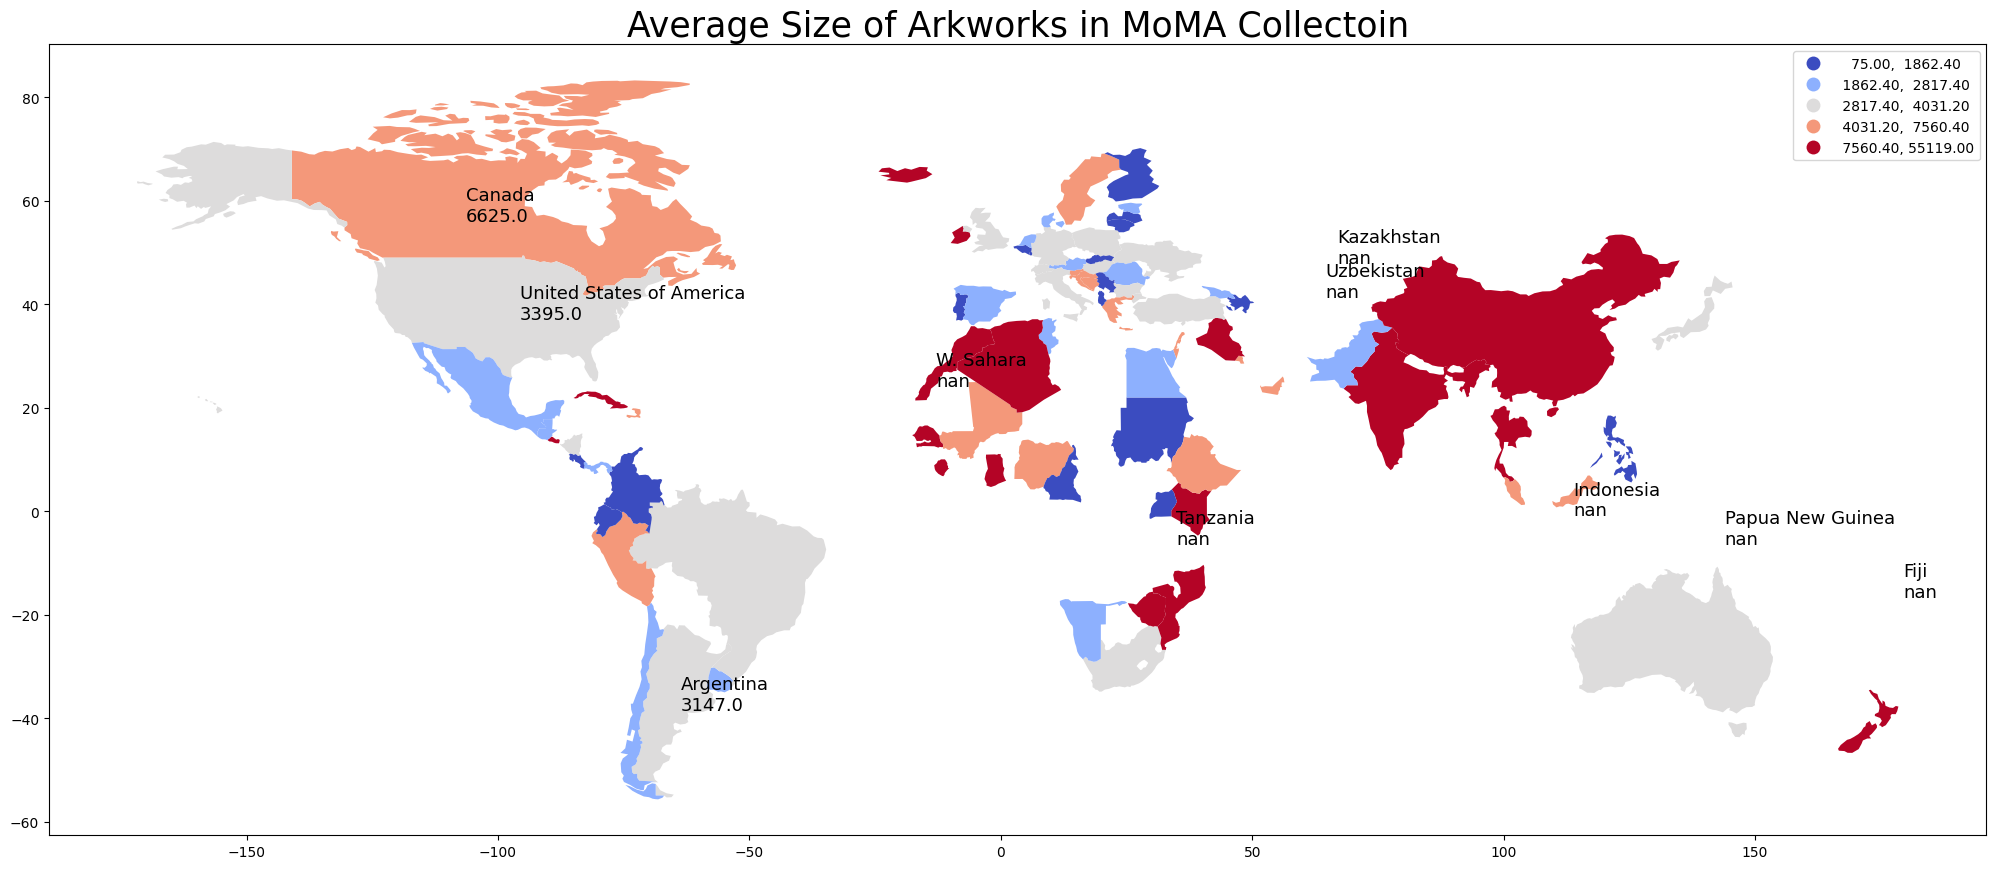

In [151]:
# plot count world map
world.plot(column='Area', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Average Size of Arkworks in MoMA Collectoin',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(world.longitude[i]),float(world.latitude[i]),"{}\n{}".format(world.name[i],world.Area[i]),size=13)
plt.show()

## Discussion
* TODO: what does the analysis show, big picture, and how are they useful
* link back to research questions

### Conclusion

## Reference
